## 0. Introduction

The purpose of this notebook is to explore the magic of log returns. Methods for calculating simple returns, log returns, and conversions from returns to prices are clearly explained with simple examples.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
prices = np.array([50.0, 54.0, 51.0, 56.0, 57.0, 63.0])
dates = pd.date_range(start='2024-01-01', periods=len(prices), freq='D')
S = pd.Series(prices, index=dates)
print(f"Price Series (S) \n\n{S}")

Price Series (S) 

2024-01-01    50.0
2024-01-02    54.0
2024-01-03    51.0
2024-01-04    56.0
2024-01-05    57.0
2024-01-06    63.0
Freq: D, dtype: float64


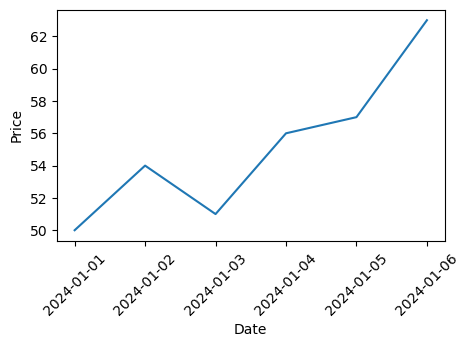

In [3]:
plt.figure(figsize=(5,3))
plt.plot(S)
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.ylabel('Price')
plt.show()

## 1. Simple returns

Simple returns, also known as arithmetic returns, are the most straightforward way to calculate returns. They are computed as the percentage change in the asset’s price over a specified period, ignoring the compounding effect. The formula for calculating simple returns is:

$$ r_t = \frac{S_t - S_{t-1}}{S_{t-1}}$$

Or, equivalently:

$$ r_t = \frac{S_t}{S_{t-1}} - \frac{S_{t-1}}{S_{t-1}} = \frac{S_t}{S_{t-1}} - 1 $$

In [4]:
r = (S / S.shift(1)) - 1
print(f"Simple Returns (r) \n\n{r}")

Simple Returns (r) 

2024-01-01         NaN
2024-01-02    0.080000
2024-01-03   -0.055556
2024-01-04    0.098039
2024-01-05    0.017857
2024-01-06    0.105263
Freq: D, dtype: float64


## 2. Log returns

Log returns, also known as continuously compounded returns, take into account the compounding effect by calculating the natural logarithm of the ratio of the asset’s final price to its initial price. The formula for calculating log returns is:

$$ R_t = \ln \left(\frac{S_t}{S_{t-1}}\right) $$

In [5]:
R = np.log(S / S.shift(1))
print(f"Log Returns (R) \n\n{R}")

Log Returns (R) 

2024-01-01         NaN
2024-01-02    0.076961
2024-01-03   -0.057158
2024-01-04    0.093526
2024-01-05    0.017700
2024-01-06    0.100083
Freq: D, dtype: float64


### 2.1 The natural logarithm and $e$

Recall that a natural logarithm is a function that is used to determine the exponent in the equation $y = e^x$. Specifically, the equation $\ln y = x$ is exactly the same as the equation $y = e^x$; the only difference is that $\ln y = x$ let's you solve for the exponent. 

Consider an example where $y = 2$. If we compute $\ln(2)$ we get $0.6931471805599453$. If we define that output as $x$, we can get back to $y$ using $e^x$. 

The natural logarithm of a number $y$, written as $\ln(y)$ or $\log_e(y)$, can therefore be considered as the power to which $e$ must be raised to equal $y$. The relationship between $e$ and the natural logarithm is that they are inverses of each other, with $e$ representing the base of the logarithm system that arises naturally from continuous exponential processes.

In [6]:
y = 2.0
x = np.log(y)
print(f"Original y: {y}")
print(f"x = ln(y): {x}")
print(f"y = e^x: {np.exp(x)}")

Original y: 2.0
x = ln(y): 0.6931471805599453
y = e^x: 2.0


### 2.2 Converting log returns back to prices

Given we know the initial price of the asset, $S_0$, we can get back to the original price series using:

$$ S_t = S_0 \, \cdot \, e^{\sum_{i=1}^{t} R_{i}} $$

$$ S = [S_0, \, S_1, \, S_2, \, \dots, \, S_t] $$

To reconstruct the price series using simple returns, one would need to accumulate these returns by multiplying each subsequent price by $1+r_t$. However, this method could lead to inaccuracies due to the compounding effect. The advantage of using log returns lies in their additive nature. When we sum up log returns over time, we're effectively adding up the individual changes in logarithmically transformed prices. This is mathematically sound because of the properties of logarithms:

$$ \ln(a \cdot b) = \ln(a) + \ln(b) $$

In [7]:
S0 = S.values[0]
S1_5 = S0 * np.exp(np.cumsum(R.values[1:], axis=0))
S_from_R = np.concatenate([np.array([S0]), S1_5])

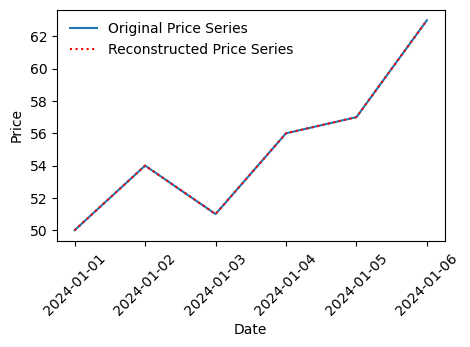

In [8]:
plt.figure(figsize=(5,3))
plt.plot(S, label='Original Price Series')
plt.plot(dates, S_from_R, linestyle='dotted', color='red', label='Reconstructed Price Series')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.ylabel('Price')
plt.legend(framealpha=0)
plt.show()

### 2.3 Converting log returns back to simple returns
To get simple returns from the log returns, you can easily do it by applying the exponential function:

$$ r_t = e^{R_t} - 1 $$

In [9]:
t = 1
print(f"{r.iloc[t]:.6f} = {np.exp(R.iloc[t]) - 1:.6f}")

0.080000 = 0.080000


### 2.4 Log returns follow a normal distribution

In the realm of asset pricing, asset prices are assumed to follow a lognormal distribution. Note that this is an approximation and not necessarily reflective of the actual distribution, but a lognormal distribution gives the desirable property to ensure that asset prices never go below zero. The asset price also seems to move in an exponential way over time.  

In addition, if the prices are lognormal distributed, then it follows that the log of its prices will have a normal distribution.  And we know that log returns can be expressed in terms of asset prices (see the equation below). So log returns are normally distributed.

$$ \ln \left(\frac{S_t}{S_0}\right) = \ln(S_t) - \ln(S_0) = \ln(1 + r_t) $$

In [10]:
t = 1
print(f"{np.log(S.iloc[t] / S0):.6f} = {np.log(S.iloc[t]) - np.log(S0):.6f} = {np.log(1 + r.iloc[t]):.6f}")

0.076961 = 0.076961 = 0.076961
